In [61]:
import pandas as pd
import numpy as np

In [62]:
df = pd.read_csv("/content/sample_data/Bike.csv")


In [63]:
df.shape
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [64]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


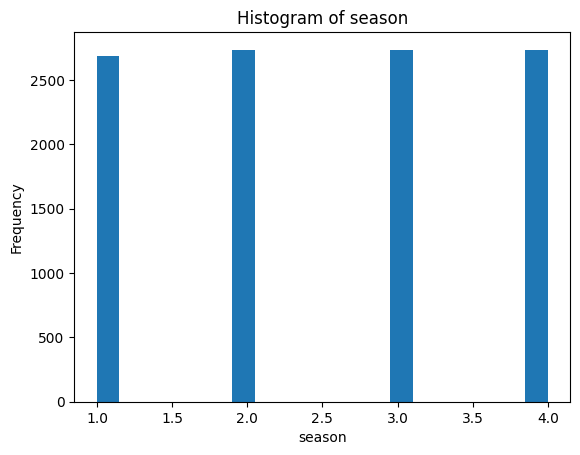

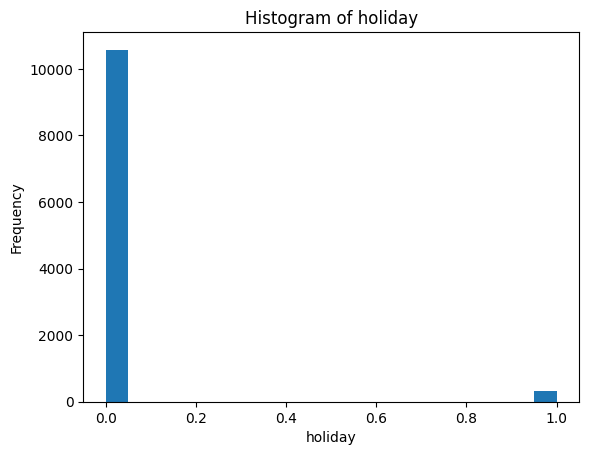

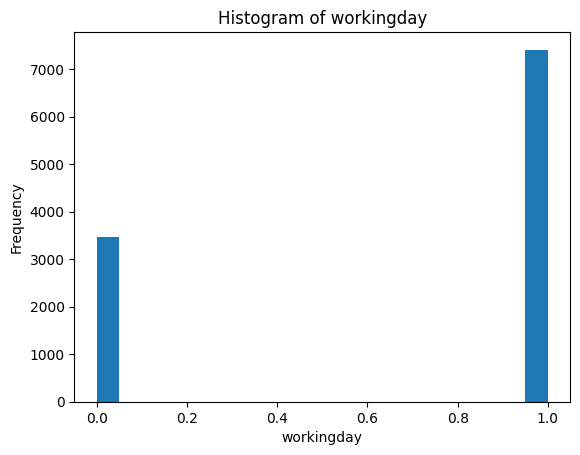

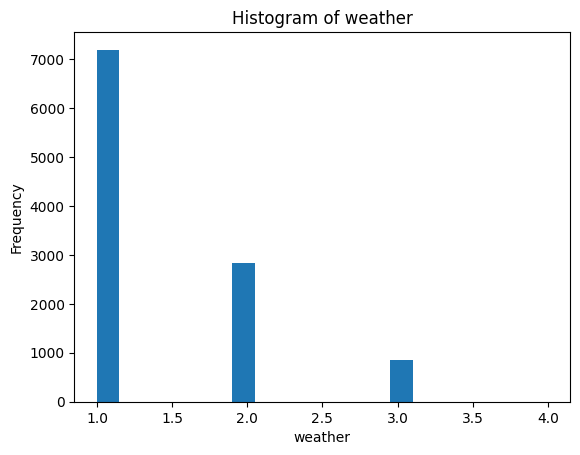

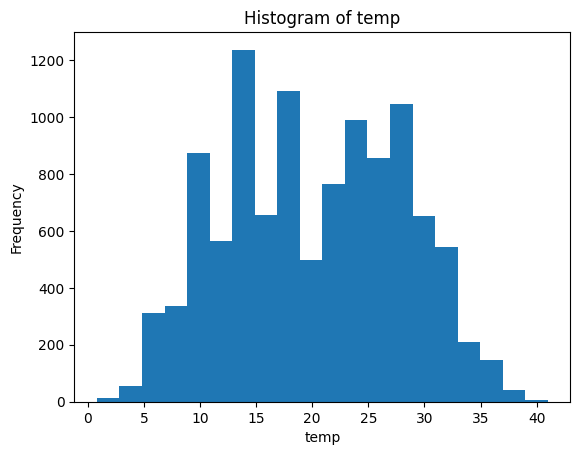

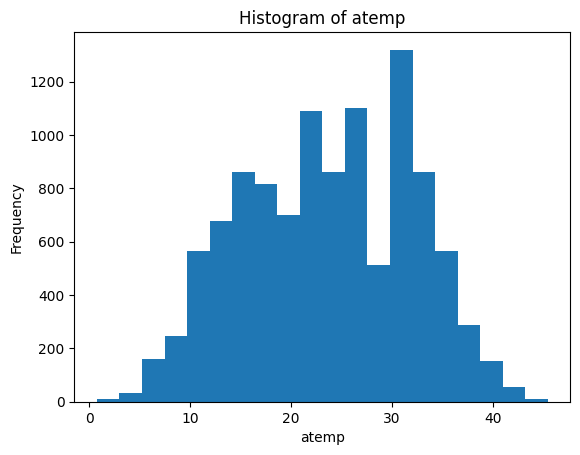

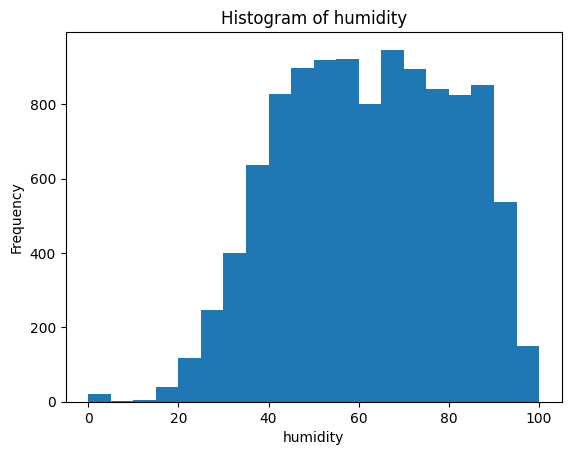

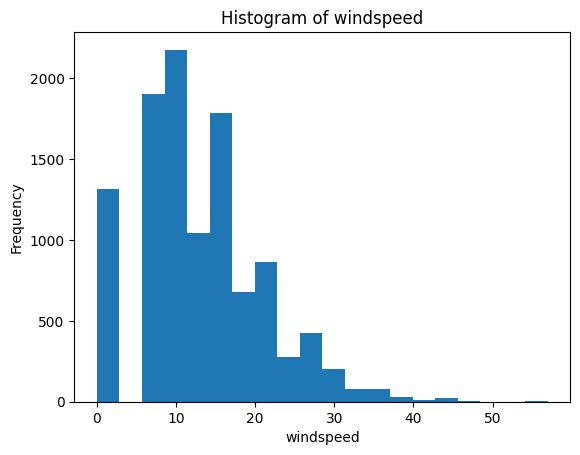

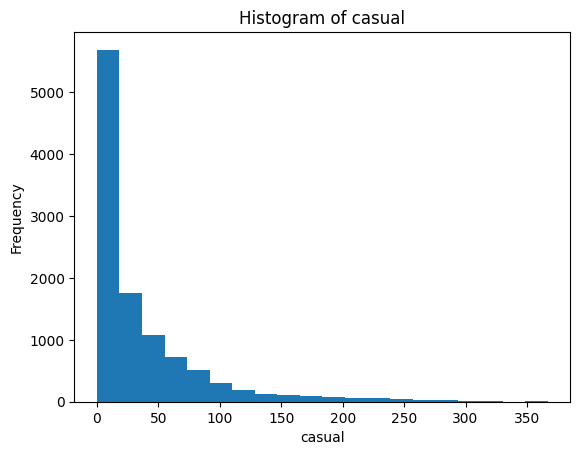

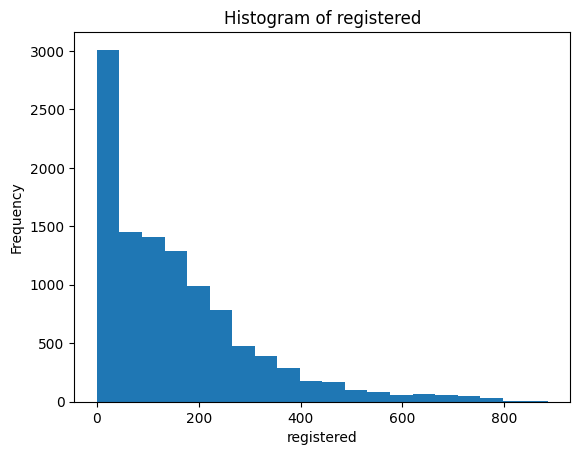

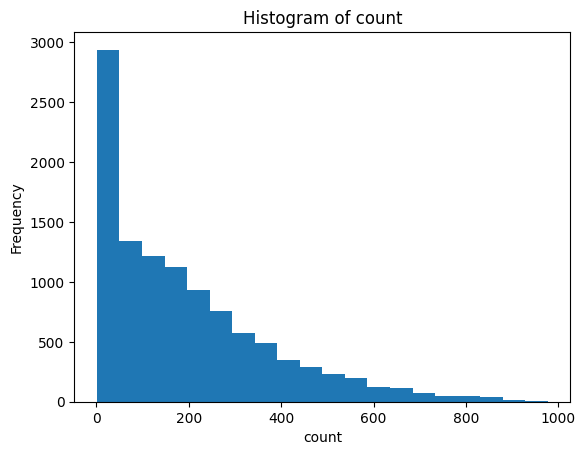

In [65]:
# prompt: Visualisez les données en affichant des histogrammes

import numpy as np
import matplotlib.pyplot as plt

# Visualisez les données en affichant des histogrammes pour chaque colonne numérique
for col in df.select_dtypes(include=np.number):
  plt.figure()
  plt.hist(df[col], bins=20)
  plt.title(f'Histogram of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()


In [66]:
import seaborn as sns

In [67]:
import matplotlib.pyplot as plt


In [68]:
df=df.drop('datetime', axis=1)

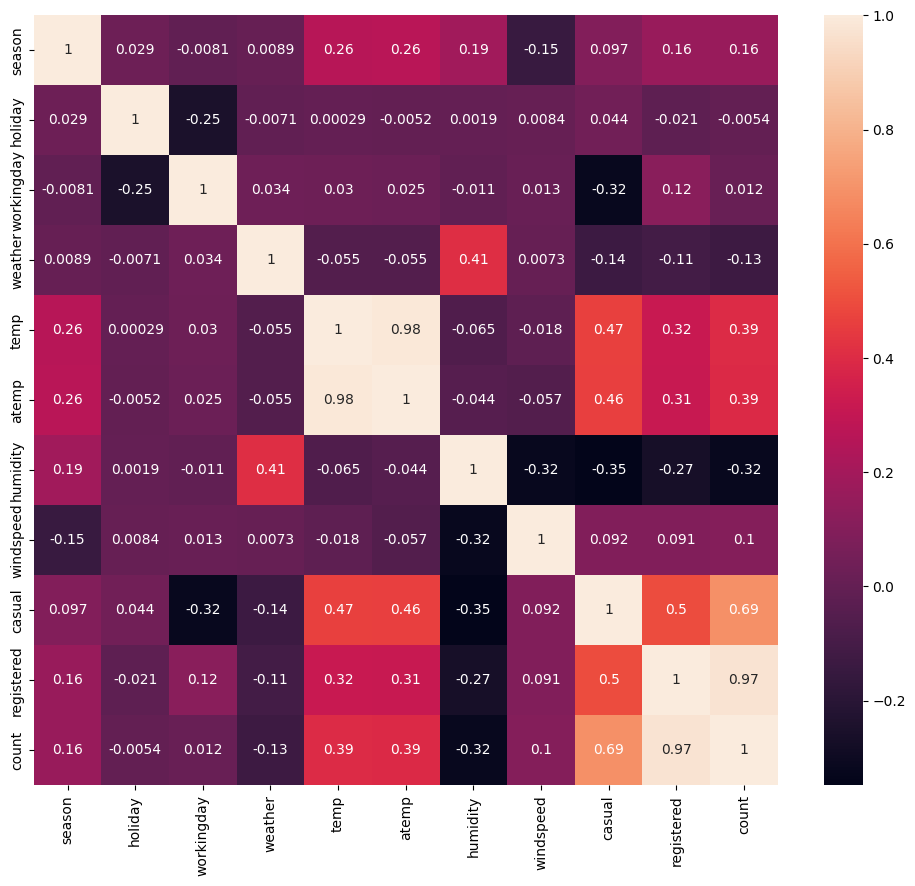

In [69]:
# prompt: sns.heatmap(df.corr(), annot=True, cmap='Blue')
# l'importation

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [70]:
from sklearn.model_selection import train_test_split

In [71]:

x = df[['casual']].values
y = df['count']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42) #Remove stratify parameter



In [72]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [73]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [74]:


# Train the model
lr = LinearRegression()
lr.fit(xtrain.reshape(-1, 1), ytrain)

# Make predictions on the test set
y_pred = lr.predict(xtest))

# Calculate the Mean Squared Error
mse = mean_squared_error(ytest, y_pred)

# Print the result
print("Mean Squared Error:", mse)


Mean Squared Error: 16753.462937470365


Mean Squared Error: 2201191.7871560524
R-squared: -65.68876493584858


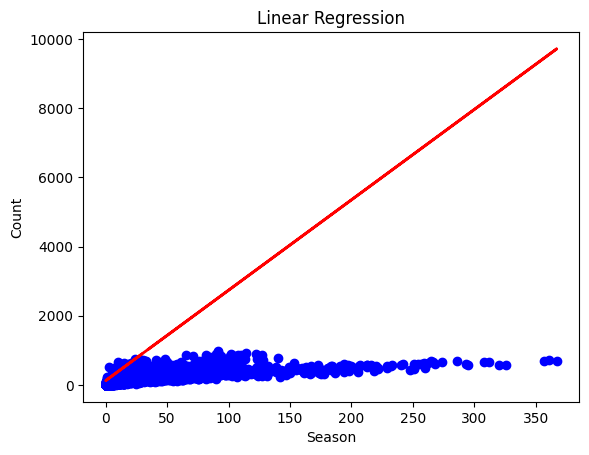

In [75]:
# Make predictions on the test set
ypred = model.predict(xtest)

# Evaluate the model (example: using Mean Squared Error)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, ypred)
print(f"Mean Squared Error: {mse}")

# You can also print other metrics like R-squared
from sklearn.metrics import r2_score
r2 = r2_score(ytest, ypred)
print(f"R-squared: {r2}")

#Plot the results
plt.scatter(xtest, ytest, color='blue')
plt.plot(xtest, ypred, color='red', linewidth=2)
plt.title('Linear Regression')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

In [76]:
# prompt: Supprimer les données non pertinantes.

# Supprimer les colonnes avec une corrélation faible avec la variable cible (par exemple, 'registered')
# Seuil de corrélation à définir (ex: 0.1)
correlation_threshold = 0.1
corr_matrix = df.corr()
target_variable = 'registered' # Remplacer par votre variable cible
corr_with_target = abs(corr_matrix[target_variable])
columns_to_drop = corr_with_target[corr_with_target < correlation_threshold].index
df = df.drop(columns=columns_to_drop)

# Afficher les colonnes restantes
df.columns


Index(['season', 'workingday', 'weather', 'temp', 'atemp', 'humidity',
       'casual', 'registered', 'count'],
      dtype='object')